In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')   # DOSYAYI OKUR 
df.head()    # İLK 5 SATIRI GETİRİR

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


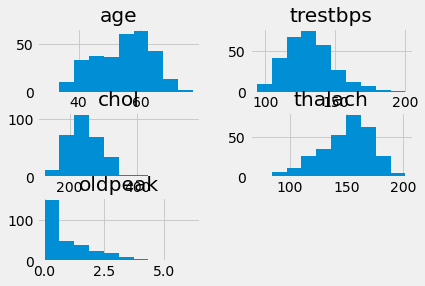

In [5]:
from matplotlib.pyplot import figure 
plt.rcParams['figure.figsize']= (6,4)
df[[ 'age','trestbps', 'chol', 'thalach', 'oldpeak']].hist();

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve, classification_report, roc_curve

In [7]:
pip install mglearn

     |████████████████████████████████| 540 kB 4.8 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=f6ff0578cdf6dcc58d9c0598f92da2afebcbfa0b90cb1fa683b87f618bd98f33
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn
Note: you may need to restart the kernel to use updated packages.


In [8]:
import mglearn

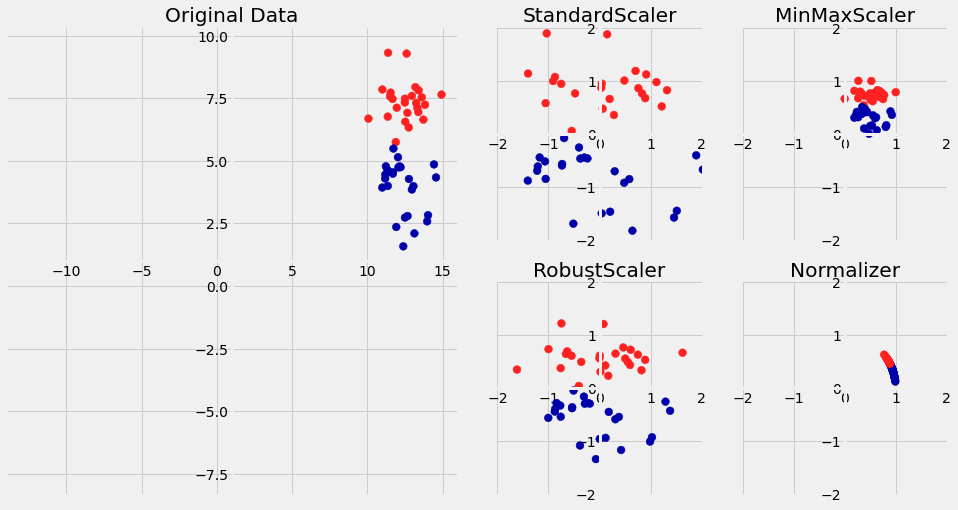

In [9]:
mglearn.plot_scaling.plot_scaling()

In [10]:
scaler = StandardScaler()
scaler.fit(df.drop('target', axis=1))   # MODELİ KURUYO

StandardScaler()

In [11]:
X = scaler.transform(df.drop('target', axis=1))  # TARGET SÜTUNUNU YANİ SONUCU ÇIKARDIK 
y = df.target   # SADECE SONUCU ALDIK
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=200)  

In [12]:
X_train[0]  # 13 DEĞİŞKENİ TUTUYORUZ

array([-0.26098049,  0.68100522, -0.93851463, -0.20696359,  0.1688269 ,
       -0.41763453,  0.89896224,  0.49647834,  1.43548113, -0.89686172,
        0.97635214,  0.26508221,  1.12302895])

In [13]:
y_train[0]   # SADECE 1 SÜTUN OLDUĞU İÇİN 1 DEĞER GELDİ. 

1

In [14]:
import seaborn as sns

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

Acc: 0.881578947368421



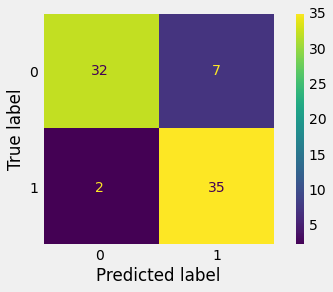

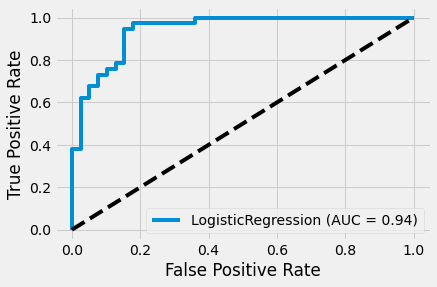

Detailed classification report:

              precision    recall  f1-score   support

     class 0       0.94      0.82      0.88        39
     class 1       0.83      0.95      0.89        37

    accuracy                           0.88        76
   macro avg       0.89      0.88      0.88        76
weighted avg       0.89      0.88      0.88        76




In [16]:
lr = LogisticRegression()    # MODELİ KURDUK    
model = lr.fit(X_train, y_train)    # EĞİTTİK

lr_predict = lr.predict(X_test)    # TEST ETTİK
lr_acc_score = accuracy_score(y_test, lr_predict)
print("Acc:",accuracy_score(y_test, lr_predict))   #accuracy(doğruluk)
print()  

plot_confusion_matrix(model, X_test, y_test)
plt.grid(False)
plt.show()

plot_roc_curve(model, X_test, y_test)
plt.plot([0,1],[0,1],'k--')
plt.show()

target_names = ['class 0', 'class 1']
print("Detailed classification report:")
print()  
print(classification_report(y_test, lr_predict, target_names=target_names))    #precision(kesinlik)
print()




Acc: 0.7763157894736842


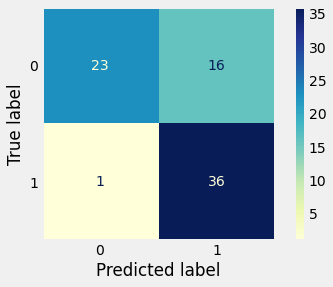

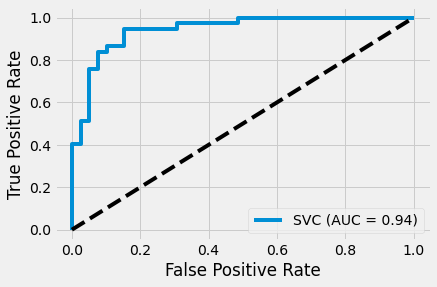

Detailed classification report:

              precision    recall  f1-score   support

     class 0       0.96      0.59      0.73        39
     class 1       0.69      0.97      0.81        37

    accuracy                           0.78        76
   macro avg       0.83      0.78      0.77        76
weighted avg       0.83      0.78      0.77        76




In [17]:
svm = SVC()
svm.C = 0.1
model = svm.fit(X_train, y_train)

svm_predict = svm.predict(X_test)

svm_accuracy_score = accuracy_score(y_test, svm_predict)
print("Acc:",accuracy_score(y_test, svm_predict))

plot_confusion_matrix(model, X_test, y_test, cmap='YlGnBu')
plt.grid(False)
plt.show()

plot_roc_curve(model, X_test, y_test)
plt.plot([0,1],[0,1],'k--')
plt.show()

target_names = ['class 0', 'class 1']
print("Detailed classification report:")
print()  
print(classification_report(y_test, svm_predict, target_names=target_names))    #precision(kesinlik)
print()

Acc: 0.8552631578947368


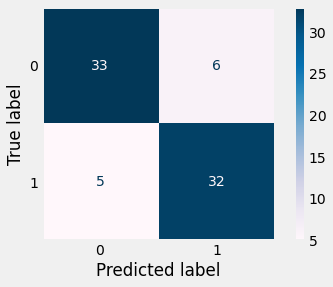

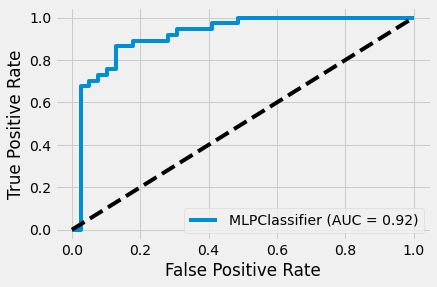

Detailed classification report:

              precision    recall  f1-score   support

     class 0       0.87      0.85      0.86        39
     class 1       0.84      0.86      0.85        37

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.86        76
weighted avg       0.86      0.86      0.86        76




In [18]:
ann = MLPClassifier()
ann.hidden_layer_size = (32,64,32)
ann.activation = 'tanh'
ann.solver = 'adam'
ann.max_iter = 1500
ann.alpha = 0.0001

model = ann.fit(X_train, y_train)

ann_predict = ann.predict(X_test)
ann_accuracy_score = accuracy_score(y_test, ann_predict)

print("Acc:",accuracy_score(y_test, ann_predict))

plot_confusion_matrix(model, X_test, y_test, cmap='PuBu')
plt.grid(False)
plt.show()

plot_roc_curve(model, X_test, y_test)
plt.plot([0,1],[0,1],'k--')
plt.show()

target_names = ['class 0', 'class 1']
print("Detailed classification report:")
print()  
print(classification_report(y_test, ann_predict, target_names=target_names))    #precision(kesinlik)
print()

Acc: 0.8289473684210527


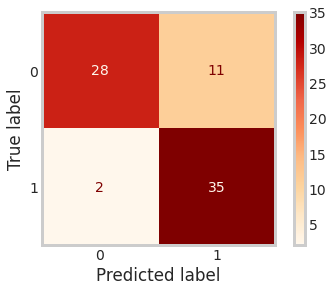

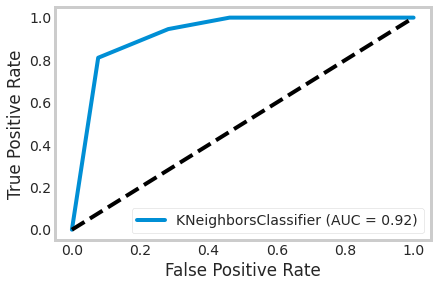

Detailed classification report:

              precision    recall  f1-score   support

     class 0       0.93      0.72      0.81        39
     class 1       0.76      0.95      0.84        37

    accuracy                           0.83        76
   macro avg       0.85      0.83      0.83        76
weighted avg       0.85      0.83      0.83        76




In [19]:
knn = KNeighborsClassifier()
model = knn.fit(X_train, y_train)

knn_predict = knn.predict(X_test)
sns.set_style('whitegrid')


print("Acc:",accuracy_score(y_test, knn_predict))

plot_confusion_matrix(model, X_test, y_test, cmap='OrRd')
plt.grid(False)
plt.show()

plot_roc_curve(knn, X_test, y_test)
plt.plot([0,1],[0,1],'k--')
plt.grid(False)
plt.show()

target_names = ['class 0', 'class 1']
print("Detailed classification report:")
print()  
print(classification_report(y_test, knn_predict, target_names=target_names))    #precision(kesinlik)
print()

In [20]:
from sklearn.metrics import roc_auc_score,roc_curve

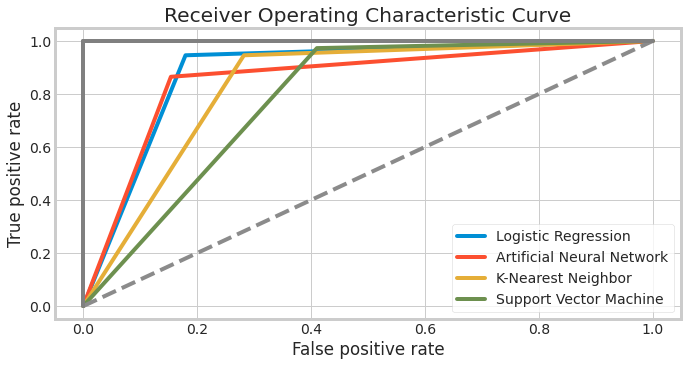

In [21]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)                                                            
ann_false_positive_rate,ann_true_positive_rate,ann_threshold = roc_curve(y_test,ann_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predict)
svm_false_positive_rate,svm_true_positive_rate,svm_threshold = roc_curve(y_test,svm_predict)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(ann_false_positive_rate,ann_true_positive_rate,label='Artificial Neural Network')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(svm_false_positive_rate,svm_true_positive_rate,label='Support Vector Machine')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

**There are four ways to check if the predictions are right or wrong:**

TN / True Negative: the case was negative and predicted negative

TP / True Positive: the case was positive and predicted positive

FN / False Negative: the case was positive but predicted negative

FP / False Positive: the case was negative but predicted positive

**Precision** — What percent of your predictions were correct?

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.

Precision:- Accuracy of positive predictions.

Precision = TP/(TP + FP)

**Recall** — What percent of the positive cases did you catch?

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall:- Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)

**F1 score** — What percent of positive predictions were correct?

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. 

As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

**Support**

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.


In [22]:
from scipy.stats import linregress #FOR SIGNIFICANCE (P-VALUE)

linregress(df['age'],df['target'])

LinregressResult(slope=-0.01238223108304477, intercept=1.2177309987821667, rvalue=-0.22543871587483721, pvalue=7.52480130344243e-05, stderr=0.0030843300574318958, intercept_stderr=0.16999978088396345)

In [23]:
linregress(df['chol'],df['target'])

LinregressResult(slope=-0.0008203668633620015, intercept=0.7465813023443757, rvalue=-0.08523910513756902, pvalue=0.13879032695600688, stderr=0.0005527165806291227, intercept_stderr=0.13908652478395953)

In [24]:
linregress(df['thalach'],df['target'])

LinregressResult(slope=0.00918478794518297, intercept=-0.8299202633611598, rvalue=0.4217409338106744, pvalue=1.6973376386561162e-14, stderr=0.0011381816770418532, intercept_stderr=0.1723024331722368)

In [25]:
linregress(df['oldpeak'],df['target'])

LinregressResult(slope=-0.18504071051274804, intercept=0.7369235109290946, rvalue=-0.4306960016873683, pvalue=4.085346391354832e-15, stderr=0.02234904645223763, intercept_stderr=0.0347987100915302)

In [26]:
linregress(df['trestbps'],df['target'])

LinregressResult(slope=-0.004122254503889467, intercept=1.0871411027198672, rvalue=-0.14493112849775144, pvalue=0.011546059200233327, stderr=0.0016221092816837168, intercept_stderr=0.21538890964791932)